<a href="https://colab.research.google.com/github/akondal4702/Speech-Emotion-Recognition/blob/main/DL_SER_Team_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 17- Speech Emotion Recognition
Manmeet Singh – 102215248

Aryan Kondal – 102215247

Aniket Singla – 102215244

In [ ]:
!pip install transformers torchaudio librosa -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.5 MB/s eta 0:00:00


In [ ]:
import torch
import torchaudio
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import os
import numpy as np
import librosa

In [ ]:
!mkdir -p RAVDESS

!wget -O RAVDESS.zip "https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1"

!unzip -q RAVDESS.zip -d RAVDESS

--2025-05-19 03:33:58--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1188976/files/Audio_Speech_Actors_01-24.zip [following]
--2025-05-19 03:33:59--  https://zenodo.org/records/1188976/files/Audio_Speech_Actors_01-24.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 208468073 (199M) [application/octet-stream]
Saving to: ‘RAVDESS.zip’

RAVDESS.zip         100%[===================>] 198.81M  9.06MB/s    in 56s     

2025-05-19 03:34:55 (3.55 MB/s) - ‘RAVDESS.zip’ saved [208468073/208468073]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r RAVDESS /content/drive/MyDrive/

^C


In [ ]:
!unzip -o "/content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24.zip" -d "/content/drive/MyDrive/RAVDESS/"

Archive:  /content/drive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24.zip
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: /content/drive/MyDrive/RAVDESS/Actor

In [ ]:
from transformers import Wav2Vec2FeatureExtractor
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

In [ ]:
import os
import torch
import torchaudio
from torch.utils.data import Dataset

# Define the emotions in RAVDESS dataset
EMOTIONS = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

MAX_AUDIO_LENGTH = 48000

def pad_or_truncate(waveform):
    if waveform.shape[1] > MAX_AUDIO_LENGTH:
        start = (waveform.shape[1] - MAX_AUDIO_LENGTH) // 2
        return waveform[:, start:start + MAX_AUDIO_LENGTH]
    elif waveform.shape[1] < MAX_AUDIO_LENGTH:
        padding = torch.zeros(1, MAX_AUDIO_LENGTH - waveform.shape[1])
        return torch.cat([waveform, padding], dim=1)
    return waveform

def collate_fn(batch):
    input_values = torch.stack([item['input_values'] for item in batch])
    labels = torch.stack([item['label'] for item in batch])
    return {
        'input_values': input_values,
        'label': labels
    }

class EmotionClassifier(torch.nn.Module):
    def __init__(self, num_emotions=8):
        super().__init__()
        from transformers import Wav2Vec2Model
        self.wav2vec = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base")
        for param in self.wav2vec.feature_extractor.parameters():
            param.requires_grad = False
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(768, 256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.3),
            torch.nn.Linear(256, num_emotions)
        )
    def forward(self, x):
        outputs = self.wav2vec(x)
        features = torch.mean(outputs.last_hidden_state, dim=1)
        return self.classifier(features)

class RavdessDataset(Dataset):
    def __init__(self, data_path, file_paths, labels, feature_extractor):
        self.data_path = data_path
        self.file_paths = file_paths
        self.labels = labels
        self.feature_extractor = feature_extractor
    def __len__(self):
        return len(self.file_paths)
    def __getitem__(self, idx):
        audio_path = os.path.join(self.data_path, self.file_paths[idx])
        waveform, sample_rate = torchaudio.load(audio_path)
        if waveform.shape[0] > 1:
            waveform = torch.mean(waveform, dim=0, keepdim=True)
        if sample_rate != 16000:
            resampler = torchaudio.transforms.Resample(sample_rate, 16000)
            waveform = resampler(waveform)
        waveform = waveform / (torch.max(torch.abs(waveform)) + 1e-6)
        waveform = pad_or_truncate(waveform)
        inputs = self.feature_extractor(
            waveform.squeeze().numpy(),
            sampling_rate=16000,
            return_tensors="pt",
            padding="max_length",
            max_length=MAX_AUDIO_LENGTH,
            truncation=True
        )
        return {
            'input_values': inputs.input_values.squeeze(),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

def prepare_data(data_path):
    file_paths = []
    labels = []
    for root, dirs, files in os.walk(data_path):
        for filename in files:
            if filename.endswith(".wav"):
                emotion_code = filename.split("-")[2]
                if emotion_code in EMOTIONS:
                    rel_path = os.path.relpath(os.path.join(root, filename), data_path)
                    file_paths.append(rel_path)
                    labels.append(int(emotion_code) - 1)
    return file_paths, labels

In [ ]:

import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
from transformers import Wav2Vec2FeatureExtractor

def train_model(model, train_loader, val_loader, device, num_epochs=10):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=3, verbose=True, min_lr=1e-7
    )
    best_accuracy = 0
    patience = 7
    patience_counter = 0
    min_accuracy_threshold = 0.90
    best_epoch = 0
    best_model_state = None

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        train_preds = []
        train_labels = []
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}')
        for batch in progress_bar:
            try:
                input_values = batch['input_values'].to(device)
                labels = batch['label'].to(device)
                optimizer.zero_grad()
                outputs = model(input_values)
                loss = criterion(outputs, labels)
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()
                train_loss += loss.item()
                predictions = torch.argmax(outputs, dim=1)
                train_preds.extend(predictions.cpu().numpy())
                train_labels.extend(labels.cpu().numpy())
                progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})
            except Exception as e:
                print(f"Error in training batch: {str(e)}")
                continue

        # Validation
        model.eval()
        val_loss = 0
        val_preds = []
        val_labels = []
        with torch.no_grad():
            for batch in val_loader:
                try:
                    input_values = batch['input_values'].to(device)
                    labels = batch['label'].to(device)
                    outputs = model(input_values)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    predictions = torch.argmax(outputs, dim=1)
                    val_preds.extend(predictions.cpu().numpy())
                    val_labels.extend(labels.cpu().numpy())
                except Exception as e:
                    print(f"Error in validation batch: {str(e)}")
                    continue

        train_accuracy = accuracy_score(train_labels, train_preds)
        val_accuracy = accuracy_score(val_labels, val_preds)
        scheduler.step(val_accuracy)

        print(f'\nEpoch {epoch + 1}:')
        print(f'Training Loss: {train_loss / len(train_loader):.4f}')
        print(f'Validation Loss: {val_loss / len(val_loader):.4f}')
        print(f'Training Accuracy: {train_accuracy:.4f}')
        print(f'Validation Accuracy: {val_accuracy:.4f}')

        # Save best model to Google Drive
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_epoch = epoch
            best_model_state = {
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'best_accuracy': best_accuracy,
            }
            torch.save(best_model_state, '/content/drive/MyDrive/best_model.pth')
            print(f'New best model saved with accuracy: {best_accuracy:.4f}')
            patience_counter = 0
        else:
            patience_counter += 1

        print('\nValidation Classification Report:')
        print(classification_report(val_labels, val_preds, target_names=list(EMOTIONS.values())))

        if best_accuracy >= min_accuracy_threshold and patience_counter >= patience:
            print(f'Early stopping triggered after {epoch + 1} epochs')
            print(f'Best accuracy of {best_accuracy:.4f} was achieved at epoch {best_epoch + 1}')
            break

    if best_model_state is not None:
        model.load_state_dict(best_model_state['model_state_dict'])
        print(f"\nLoaded best model from epoch {best_epoch + 1} with accuracy: {best_accuracy:.4f}")

    return best_accuracy

# --- DATA PREPARATION AND TRAINING ---

# Set your data path
data_path = "/content/drive/MyDrive/RAVDESS/"

print("Preparing data...")
file_paths, labels = prepare_data(data_path)
print(f"Found {len(file_paths)} files.")

if not file_paths:
    print("No .wav files found! Check your data_path.")
else:
    train_files, val_files, train_labels, val_labels = train_test_split(
        file_paths, labels, test_size=0.2, random_state=42, stratify=labels
    )
    print("Split data.")

    feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base")

    train_dataset = RavdessDataset(data_path, train_files, train_labels, feature_extractor)
    val_dataset = RavdessDataset(data_path, val_files, val_labels, feature_extractor)
    print("Created datasets.")

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)
    print("Created dataloaders.")

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model = EmotionClassifier().to(device)
    print("Model initialized.")

    train_model(model, train_loader, val_loader, device, num_epochs=10)
    print("Training complete.")


Preparing data...
Found 2880 files.
Split data.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Created datasets.
Created dataloaders.


config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Model initialized.



Epoch 1/10: 100%|██████████| 144/144 [08:22<00:00,  3.49s/it, loss=1.5831]



Epoch 1:
Training Loss: 1.9506
Validation Loss: 1.7039
Training Accuracy: 0.2986
Validation Accuracy: 0.4514


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


New best model saved with accuracy: 0.4514

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00        38
        calm       0.37      0.97      0.54        76
       happy       0.35      0.27      0.31        77
         sad       0.38      0.04      0.07        77
       angry       0.67      0.75      0.71        77
     fearful       0.62      0.45      0.53        77
     disgust       0.88      0.09      0.16        77
   surprised       0.39      0.81      0.52        77

    accuracy                           0.45       576
   macro avg       0.46      0.42      0.36       576
weighted avg       0.49      0.45      0.38       576



Epoch 2/10: 100%|██████████| 144/144 [03:12<00:00,  1.34s/it, loss=1.2640]



Epoch 2:
Training Loss: 1.4964
Validation Loss: 1.2321
Training Accuracy: 0.5525
Validation Accuracy: 0.6788
New best model saved with accuracy: 0.6788

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       1.00      0.13      0.23        38
        calm       0.48      0.99      0.65        76
       happy       1.00      0.23      0.38        77
         sad       0.55      0.27      0.37        77
       angry       0.98      0.78      0.87        77
     fearful       0.71      0.87      0.78        77
     disgust       0.80      0.94      0.86        77
   surprised       0.64      0.95      0.76        77

    accuracy                           0.68       576
   macro avg       0.77      0.64      0.61       576
weighted avg       0.76      0.68      0.64       576



Epoch 3/10: 100%|██████████| 144/144 [03:05<00:00,  1.29s/it, loss=0.8348]



Epoch 3:
Training Loss: 1.0822
Validation Loss: 0.8875
Training Accuracy: 0.7504
Validation Accuracy: 0.8073
New best model saved with accuracy: 0.8073

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       0.60      0.24      0.34        38
        calm       0.55      1.00      0.71        76
       happy       0.91      0.77      0.83        77
         sad       0.81      0.44      0.57        77
       angry       0.97      0.92      0.95        77
     fearful       0.87      0.88      0.88        77
     disgust       0.93      0.97      0.95        77
   surprised       0.86      0.95      0.90        77

    accuracy                           0.81       576
   macro avg       0.81      0.77      0.77       576
weighted avg       0.83      0.81      0.80       576



Epoch 4/10: 100%|██████████| 144/144 [03:05<00:00,  1.29s/it, loss=0.9404]



Epoch 4:
Training Loss: 0.7981
Validation Loss: 0.6731
Training Accuracy: 0.8702
Validation Accuracy: 0.8767
New best model saved with accuracy: 0.8767

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       0.75      0.95      0.84        38
        calm       0.84      0.88      0.86        76
       happy       0.80      0.84      0.82        77
         sad       0.76      0.81      0.78        77
       angry       0.96      0.95      0.95        77
     fearful       1.00      0.79      0.88        77
     disgust       0.97      0.97      0.97        77
   surprised       0.93      0.86      0.89        77

    accuracy                           0.88       576
   macro avg       0.88      0.88      0.88       576
weighted avg       0.88      0.88      0.88       576



Epoch 5/10: 100%|██████████| 144/144 [03:08<00:00,  1.31s/it, loss=0.3754]



Epoch 5:
Training Loss: 0.5647
Validation Loss: 0.5291
Training Accuracy: 0.9306
Validation Accuracy: 0.8941
New best model saved with accuracy: 0.8941

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       0.81      0.79      0.80        38
        calm       0.78      0.97      0.87        76
       happy       0.89      0.86      0.87        77
         sad       0.82      0.79      0.81        77
       angry       0.99      0.97      0.98        77
     fearful       1.00      0.79      0.88        77
     disgust       0.96      1.00      0.98        77
   surprised       0.90      0.92      0.91        77

    accuracy                           0.89       576
   macro avg       0.89      0.89      0.89       576
weighted avg       0.90      0.89      0.89       576



Epoch 6/10: 100%|██████████| 144/144 [03:05<00:00,  1.29s/it, loss=0.4171]



Epoch 6:
Training Loss: 0.4085
Validation Loss: 0.3965
Training Accuracy: 0.9518
Validation Accuracy: 0.9184
New best model saved with accuracy: 0.9184

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       0.63      1.00      0.78        38
        calm       0.97      0.84      0.90        76
       happy       0.90      0.92      0.91        77
         sad       0.89      0.87      0.88        77
       angry       0.97      0.97      0.97        77
     fearful       0.94      0.88      0.91        77
     disgust       1.00      0.99      0.99        77
   surprised       0.99      0.91      0.95        77

    accuracy                           0.92       576
   macro avg       0.91      0.92      0.91       576
weighted avg       0.93      0.92      0.92       576



Epoch 7/10: 100%|██████████| 144/144 [03:06<00:00,  1.30s/it, loss=0.1367]



Epoch 7:
Training Loss: 0.2539
Validation Loss: 0.2892
Training Accuracy: 0.9761
Validation Accuracy: 0.9392
New best model saved with accuracy: 0.9392

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       0.78      0.95      0.86        38
        calm       0.96      0.89      0.93        76
       happy       0.97      0.87      0.92        77
         sad       0.86      0.95      0.90        77
       angry       0.99      0.97      0.98        77
     fearful       0.99      0.91      0.95        77
     disgust       1.00      1.00      1.00        77
   surprised       0.93      0.97      0.95        77

    accuracy                           0.94       576
   macro avg       0.93      0.94      0.93       576
weighted avg       0.94      0.94      0.94       576



Epoch 8/10: 100%|██████████| 144/144 [03:06<00:00,  1.30s/it, loss=0.2415]



Epoch 8:
Training Loss: 0.2019
Validation Loss: 0.2455
Training Accuracy: 0.9701
Validation Accuracy: 0.9531
New best model saved with accuracy: 0.9531

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       0.79      1.00      0.88        38
        calm       0.99      0.95      0.97        76
       happy       1.00      0.84      0.92        77
         sad       0.95      0.96      0.95        77
       angry       0.99      0.97      0.98        77
     fearful       1.00      0.92      0.96        77
     disgust       1.00      1.00      1.00        77
   surprised       0.88      1.00      0.93        77

    accuracy                           0.95       576
   macro avg       0.95      0.96      0.95       576
weighted avg       0.96      0.95      0.95       576



Epoch 9/10: 100%|██████████| 144/144 [03:06<00:00,  1.29s/it, loss=0.0623]



Epoch 9:
Training Loss: 0.1424
Validation Loss: 0.2748
Training Accuracy: 0.9774
Validation Accuracy: 0.9444

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       0.90      0.92      0.91        38
        calm       0.90      0.97      0.94        76
       happy       1.00      0.83      0.91        77
         sad       0.88      0.97      0.93        77
       angry       0.99      0.97      0.98        77
     fearful       1.00      0.87      0.93        77
     disgust       1.00      1.00      1.00        77
   surprised       0.90      1.00      0.94        77

    accuracy                           0.94       576
   macro avg       0.95      0.94      0.94       576
weighted avg       0.95      0.94      0.94       576



Epoch 10/10: 100%|██████████| 144/144 [02:42<00:00,  1.13s/it, loss=0.0440]



Epoch 10:
Training Loss: 0.1005
Validation Loss: 0.2678
Training Accuracy: 0.9844
Validation Accuracy: 0.9444

Validation Classification Report:
              precision    recall  f1-score   support

     neutral       0.94      0.89      0.92        38
        calm       0.85      1.00      0.92        76
       happy       0.91      0.90      0.90        77
         sad       0.92      0.95      0.94        77
       angry       1.00      0.97      0.99        77
     fearful       0.97      0.92      0.95        77
     disgust       1.00      1.00      1.00        77
   surprised       0.97      0.90      0.93        77

    accuracy                           0.94       576
   macro avg       0.95      0.94      0.94       576
weighted avg       0.95      0.94      0.94       576


Loaded best model from epoch 8 with accuracy: 0.9531
Training complete.


In [ ]:
import os
import pandas as pd

def load_audio(audio_path):
    waveform, sample_rate = torchaudio.load(audio_path)
    if waveform.shape[0] > 1:
        waveform = torch.mean(waveform, dim=0, keepdim=True)
    if sample_rate != 16000:
        resampler = torchaudio.transforms.Resample(sample_rate, 16000)
        waveform = resampler(waveform)
    waveform = waveform / (torch.max(torch.abs(waveform)) + 1e-6)
    waveform = pad_or_truncate(waveform)
    return waveform

def predict_emotion(model, feature_extractor, audio_path, device):
    waveform = load_audio(audio_path)
    inputs = feature_extractor(
        waveform.squeeze().numpy(),
        sampling_rate=16000,
        return_tensors="pt",
        padding="max_length",
        max_length=MAX_AUDIO_LENGTH,
        truncation=True
    )
    model.eval()
    with torch.no_grad():
        input_values = inputs.input_values.to(device)
        outputs = model(input_values)
        predictions = torch.softmax(outputs, dim=1)
        predicted_id = torch.argmax(predictions, dim=1).item()
    emotion_id = str(predicted_id + 1).zfill(2)
    emotion = EMOTIONS[emotion_id]
    confidence = predictions[0][predicted_id].item()
    return emotion, confidence

# --- PREDICTION FOR ALL FILES ---

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = EmotionClassifier().to(device)
checkpoint = torch.load('/content/drive/MyDrive/best_model.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base")

ravdess_root = "/content/drive/MyDrive/RAVDESS"

wav_files = []
for root, dirs, files in os.walk(ravdess_root):
    for file in files:
        if file.endswith('.wav'):
            wav_files.append(os.path.join(root, file))

print(f"Found {len(wav_files)} wav files.")

results = []
for audio_path in wav_files:
    try:
        emotion, confidence = predict_emotion(model, feature_extractor, audio_path, device)
        results.append({
            "file": audio_path,
            "emotion": emotion,
            "confidence": confidence
        })
        print(f"{audio_path}: {emotion} ({confidence:.2%})")
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

results_df = pd.DataFrame(results)
results_df.to_csv("/content/drive/MyDrive/ravdess_predictions.csv", index=False)
print("Saved predictions to /content/drive/MyDrive/ravdess_predictions.csv")

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Found 2880 wav files.
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav: neutral (86.63%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-01-02-01.wav: neutral (86.68%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-02-01-01.wav: neutral (86.57%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-02-02-01.wav: neutral (86.66%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-01-01-01-01.wav: calm (94.45%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-01-01-02-01.wav: calm (94.01%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-01-02-01-01.wav: calm (94.43%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-01-02-02-01.wav: calm (94.42%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-02-01-01-01.wav: calm (94.43%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-02-01-02-01.wav: calm (94.40%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-02-02-01-01.wav: calm (94.42%)
/content/drive/MyDrive/RAVDESS/Actor_01/03-01-02-02-02-02-01.wav: calm (94.39%)
/conte

Overall Accuracy: 0.9531
F1 Score (macro): 0.9492
F1 Score (micro): 0.9531
F1 Score (weighted): 0.9536

Classification Report:
              precision    recall  f1-score   support

     neutral       0.79      1.00      0.88        38
        calm       0.99      0.95      0.97        76
       happy       1.00      0.84      0.92        77
         sad       0.95      0.96      0.95        77
       angry       0.99      0.97      0.98        77
     fearful       1.00      0.92      0.96        77
     disgust       1.00      1.00      1.00        77
   surprised       0.88      1.00      0.93        77

    accuracy                           0.95       576
   macro avg       0.95      0.96      0.95       576
weighted avg       0.96      0.95      0.95       576



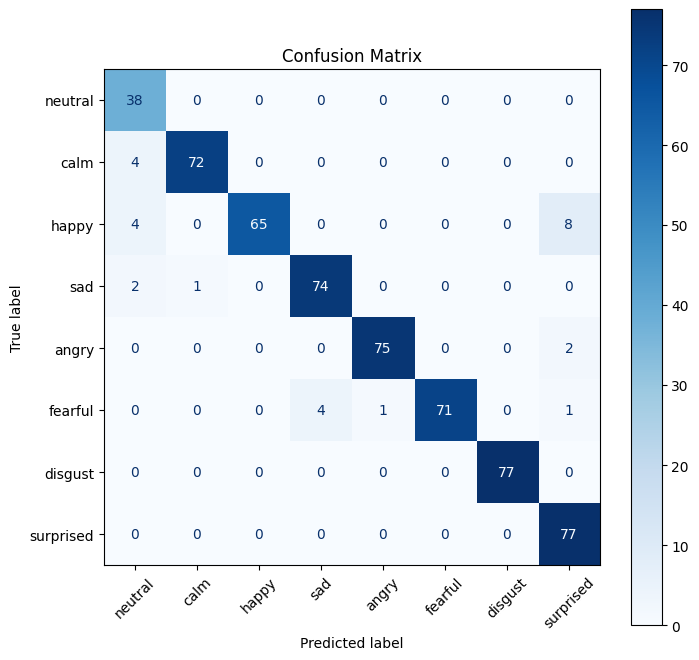

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- EVALUATION ON VALIDATION SET ---

# Make sure you have val_loader, model, device, and EMOTIONS already defined

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for batch in val_loader:
        input_values = batch['input_values'].to(device)
        labels = batch['label'].to(device)
        outputs = model(input_values)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate overall accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Overall Accuracy: {accuracy:.4f}")

# Calculate F1 score (macro, micro, weighted)
f1_macro = f1_score(all_labels, all_preds, average='macro')
f1_micro = f1_score(all_labels, all_preds, average='micro')
f1_weighted = f1_score(all_labels, all_preds, average='weighted')
print(f"F1 Score (macro): {f1_macro:.4f}")
print(f"F1 Score (micro): {f1_micro:.4f}")
print(f"F1 Score (weighted): {f1_weighted:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=list(EMOTIONS.values())))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(EMOTIONS.values()))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

